<a href="https://colab.research.google.com/github/chifaawehbe/open-science-team1/blob/main/Preliminary_Data_Analysis_Team_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TEAM 1 (this is not the final data analysis!! Just a prototype)**

# **Data Preprocessing and Cleaning**

In [ ]:
# Importations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 200
%matplotlib inline
from matplotlib.pyplot import figure as fig
from collections import Counter

In [ ]:
df = pd.read_csv('Sleeping quality.csv') #read the data frame

In [ ]:
df2 = df.reset_index() #add an index column 

In [ ]:
df3 = df2.rename(columns={'index': 'User ID'}) #turn the index column into an User ID column in order to anonymize the users

In [ ]:
#Clean the data frame by removing the useless column
final_df = df3.drop('Username',1).drop('Timestamp',1).drop("Agreement for data collection and further participation / Accord pour la collecte de donnée et participation à l'enquête",1)

In [ ]:
final_df.set_index("User ID", inplace = True)# put user ID as the first column
final_df.head(2) #how our final data frame looks like

,Were you in France during lockdowns? / Étiez-vous en France pendant le confinement ?,Are you following courses in France? / Suivez-vous vos cours en France ?,Your current student status / Votre niveau d'étude actuel,Are you a CRI student? / Etes-vous étudiant au CRI ?,Your age / Votre âge,To which gender do you identify? / A quel genre vous identifiez-vous ?,Are you living alone? / Vivez-vous seul ?,Do you have a pet living with you? / Vivez-vous avec un animal de compagnie ?,How many hours do you spend outdoors daily? (average) / Combien de temps passez-vous à l'extérieur par jour (en moyenne) ?,"How many times per week you get to meet some friends/family/colleagues not currently living with you? (average) / Combien de fois par semaine voyez-vous des amis, de la famille ou des collègues qui n'habitent pas actuellement avec vous ?","How many hours do you spend daily in front of a screen (TV, PC, phone...) (average)? / Combien d'heures passez-vous chaque jour devant un écran (télévision, ordinateur, téléphone... (en moyenne) ?","On average, when do you go to bed? / En moyenne, à quelle heure vous couchez-vous ?","On average, when do you wake up? / En moyenne, à quelle heure vous réveillez-vous ?","On average and during the last week, how often have you felt stressed out? / En moyenne, combien de fois vous êtes-vous sentis stressés cette semaine ?","On average, how many times do you wake up while sleeping every night? / En moyenne, à quelle fréquence vous réveillez-vous la nuit ?","On average, how long does it take to fall asleep? / En général, combien de temps mettez-vous à vous endormir ?"
User ID,,,,,,,,,,,,,,,,
0,Yes / Oui,Yes / Oui,PhD / Doctorat,No / Non,>30,Male / Homme,Yes / Oui,No / Non,3,4,10,00:00,08:30,Everyday / Tous les jours,1,30 min to 1h / De 30 minutes à 1h
1,Iran,Yes / Oui,Master,Yes / Oui,28 - 30,Female / Femme,Yes / Oui,No / Non,7,4,4,00:00,08:00,A few times (once or twice) / Quelques fois (u...,1,15 to 30 min / De 15 à 30 minutes


In [ ]:
#add some column for some categorical data in order to make them more easily analyzable
final_clean_df = final_df

final_clean_df.loc[(final_clean_df["Are you living alone? / Vivez-vous seul ?"] == 'Yes / Oui'),"Are you living alone? / Vivez-vous seul ?"]=1
final_clean_df.loc[(final_clean_df["Are you living alone? / Vivez-vous seul ?"] == 'No / Non'),"Are you living alone? / Vivez-vous seul ?"]=2

final_clean_df.loc[(final_clean_df["Do you have a pet living with you? / Vivez-vous avec un animal de compagnie ?"] == 'Yes / Oui'),"Do you have a pet living with you? / Vivez-vous avec un animal de compagnie ?"]=3
final_clean_df.loc[(final_clean_df["Do you have a pet living with you? / Vivez-vous avec un animal de compagnie ?"] == 'No / Non'),"Do you have a pet living with you? / Vivez-vous avec un animal de compagnie ?"]=0
final_clean_df.loc[(final_clean_df["Do you have a pet living with you? / Vivez-vous avec un animal de compagnie ?"] == "Yes and it doesn't require to go out / Oui, un animal qui ne nécessite pas de sortir"),"Do you have a pet living with you? / Vivez-vous avec un animal de compagnie ?"]=1
final_clean_df.loc[(final_clean_df["Do you have a pet living with you? / Vivez-vous avec un animal de compagnie ?"] == "Yes and it requires to go out (e.g. dog) / Oui, un animal qui nécessite de sortir (comme un chien)"),"Do you have a pet living with you? / Vivez-vous avec un animal de compagnie ?"]=2

final_clean_df.loc[(final_clean_df["On average and during the last week, how often have you felt stressed out? / En moyenne, combien de fois vous êtes-vous sentis stressés cette semaine ?"] == "A few times (once or twice) / Quelques fois (une fois ou deux)"),"On average and during the last week, how often have you felt stressed out? / En moyenne, combien de fois vous êtes-vous sentis stressés cette semaine ?"]=1
final_clean_df.loc[(final_clean_df["On average and during the last week, how often have you felt stressed out? / En moyenne, combien de fois vous êtes-vous sentis stressés cette semaine ?"] == "Everyday / Tous les jours"),"On average and during the last week, how often have you felt stressed out? / En moyenne, combien de fois vous êtes-vous sentis stressés cette semaine ?"]=3
final_clean_df.loc[(final_clean_df["On average and during the last week, how often have you felt stressed out? / En moyenne, combien de fois vous êtes-vous sentis stressés cette semaine ?"] == "Often (three or four times) / Souvent (trois ou quatre fois)"),"On average and during the last week, how often have you felt stressed out? / En moyenne, combien de fois vous êtes-vous sentis stressés cette semaine ?"]=2




In [ ]:
# Let's check the data we are manipulating 
display(final_df.dtypes)
display(final_df.info)
display(final_df.describe)
display(final_df.columns)

Were you in France during lockdowns? / Étiez-vous en France pendant le confinement ?                                                                                                                                                              object
Are you following courses in France? / Suivez-vous vos cours en France ?                                                                                                                                                                          object
Your current student status / Votre niveau d'étude actuel                                                                                                                                                                                         object
Are you a CRI student? / Etes-vous étudiant au CRI ?                                                                                                                                                                                              object
Your

<bound method DataFrame.info of         Were you in France during lockdowns? / Étiez-vous en France pendant le confinement ?  \
User ID                                                                                        
0                                                Yes / Oui                                     
1                                                     Iran                                     
2                                                Yes / Oui                                     
3                                                Yes / Oui                                     
4                                                Yes / Oui                                     
5                                                Yes / Oui                                     
6                                                Yes / Oui                                     
7                                                Yes / Oui                                     
8       

<bound method NDFrame.describe of         Were you in France during lockdowns? / Étiez-vous en France pendant le confinement ?  \
User ID                                                                                        
0                                                Yes / Oui                                     
1                                                     Iran                                     
2                                                Yes / Oui                                     
3                                                Yes / Oui                                     
4                                                Yes / Oui                                     
5                                                Yes / Oui                                     
6                                                Yes / Oui                                     
7                                                Yes / Oui                                     
8     

Index(['Were you in France during lockdowns? / Étiez-vous en France pendant le confinement ?',
       'Are you following courses in France? / Suivez-vous vos cours en France ?',
       'Your current student status / Votre niveau d'étude actuel',
       'Are you a CRI student? / Etes-vous étudiant au CRI ?',
       'Your age / Votre âge',
       'To which gender do you identify? / A quel genre vous identifiez-vous ?',
       'Are you living alone? / Vivez-vous seul ?',
       'Do you have a pet living with you? / Vivez-vous avec un animal de compagnie ?',
       'How many hours do you spend outdoors daily? (average) / Combien de temps passez-vous à l'extérieur par jour (en moyenne) ?',
       'How many times per week you get to meet some friends/family/colleagues not currently living with you? (average) / Combien de fois par semaine voyez-vous des amis, de la famille ou des collègues qui n'habitent pas actuellement avec vous ? ',
       'How many hours do you spend daily in front of a s

In [ ]:
#For the categorical columns of the dataset we want to see how many instances of each category there are
display(final_df.iloc[:, :8].value_counts())
display(final_df.iloc[:, 11:14].value_counts())
display(final_df.iloc[:, -1:].value_counts())

Were you in France during lockdowns? / Étiez-vous en France pendant le confinement ?  Are you following courses in France? / Suivez-vous vos cours en France ?  Your current student status / Votre niveau d'étude actuel  Are you a CRI student? / Etes-vous étudiant au CRI ?  Your age / Votre âge  To which gender do you identify? / A quel genre vous identifiez-vous ?  Are you living alone? / Vivez-vous seul ?  Do you have a pet living with you? / Vivez-vous avec un animal de compagnie ?
Yes / Oui                                                                             Yes / Oui                                                                 Bachelor / Licence                                         No / Non                                              18 - 22               Female / Femme                                                          2                                          0                                                                                4
no                 

On average, when do you go to bed? / En moyenne, à quelle heure vous couchez-vous ?  On average, when do you wake up? / En moyenne, à quelle heure vous réveillez-vous ?   On average and during the last week, how often have you felt stressed out? / En moyenne, combien de fois vous êtes-vous sentis stressés cette semaine ?
21:00                                                                                05:00                                                                                 1                                                                                                                                                          2
23:30                                                                                07:30                                                                                 3                                                                                                                                                          1
00:45                

On average, how long does it take to fall asleep? / En général, combien de temps mettez-vous à vous endormir ?
15 to 30 min / De 15 à 30 minutes                                                                                 11
Instantly - less than 15 min / Instantanément - moins de 15 minutes                                                7
More than 1h / Plus d'1h                                                                                           1
30 min to 1h / De 30 minutes à 1h                                                                                  1
dtype: int64

# **Data Visualizations and Explanations**

**Participants’ general profiles**

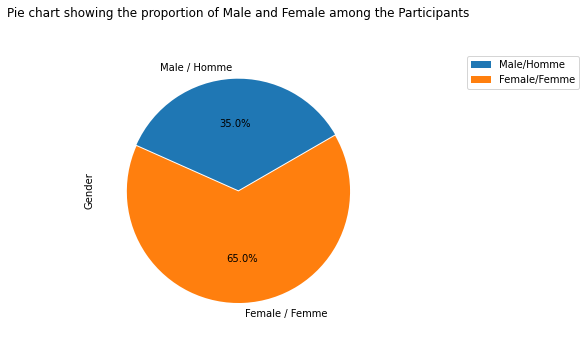

In [ ]:
#Gender
gender_list = final_df["To which gender do you identify? / A quel genre vous identifiez-vous ?"].to_list()
gender_dict = dict(Counter(gender_list))
gender_name = list(gender_dict.keys())
gender_numb = list(gender_dict.values())
explode = (0, 0.01)
data = {'Gender': gender_numb}
dfpie = pd.DataFrame(data,columns=['Gender'],index = gender_name)
dfpie
dfpie.plot.pie(y='Gender',figsize=(5, 90), explode=explode, autopct='%1.1f%%', startangle=30)

plt.legend(['Male/Homme','Female/Femme'], bbox_to_anchor=(1.3, 1.0), loc='upper left')
plt.title('Pie chart showing the proportion of Male and Female among the Participants', y=1.1)
plt.show()


The data analyzed corresponds to the 20 participants (vs 18 last year during the lockdown) that answered the first survey.

This year we had 35% Males and 65% Females which is quite similar as last year (67/33).

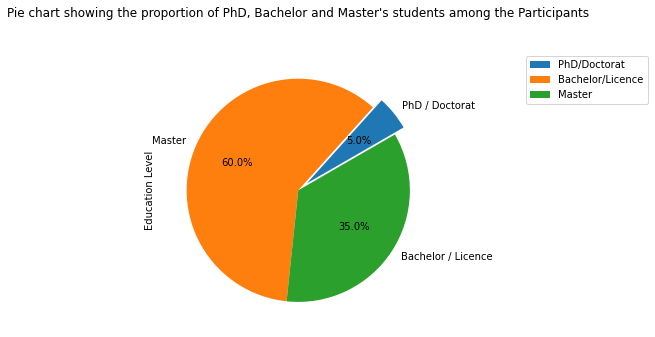

In [ ]:
#Education Level
ed_list = final_df["Your current student status / Votre niveau d'étude actuel"].to_list()
ed_dict = dict(Counter(ed_list))
ed_name = list(ed_dict.keys())
ed_numb = list(ed_dict.values())
explode2 = (0.1, 0, 0)
data = {'Education Level': ed_numb}
dfpie2 = pd.DataFrame(data,columns=['Education Level'],index = ed_name)
dfpie2
dfpie2.plot.pie(y='Education Level',figsize=(5, 90), explode=explode2, autopct='%1.1f%%', startangle=30)

plt.legend(['PhD/Doctorat','Bachelor/Licence', 'Master'], bbox_to_anchor=(1.3, 1.0), loc='upper left')
plt.title("Pie chart showing the proportion of PhD, Bachelor and Master's students among the Participants", y=1.1)
plt.show()

This year we had 5% of PhD, 60% of Master's students and 35% of bachelor's student which is less similar as last year (61% of are master students, 22% bachelor students and 16.7% PhD students).

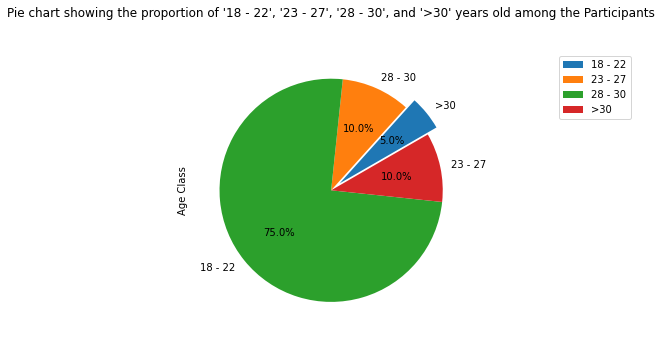

In [ ]:
#Age
age_list = final_df["Your age / Votre âge"].to_list()
age_dict = dict(Counter(age_list))
age_name = list(age_dict.keys())
age_numb = list(age_dict.values())
explode3 = (0.1, 0, 0, 0)
data = {'Age Class': age_numb}
dfpie3 = pd.DataFrame(data,columns=['Age Class'],index = age_name)
dfpie3
dfpie3.plot.pie(y='Age Class',figsize=(5, 90), explode=explode3, autopct='%1.1f%%', startangle=30)

plt.legend(['18 - 22','23 - 27', '28 - 30', '>30'], bbox_to_anchor=(1.3, 1.0), loc='upper left')
plt.title("Pie chart showing the proportion of '18 - 22', '23 - 27', '28 - 30', and '>30' years old among the Participants", y=1.1)
plt.show()

Most of the participants are between 18 and 22 years old which is similar to last year results.

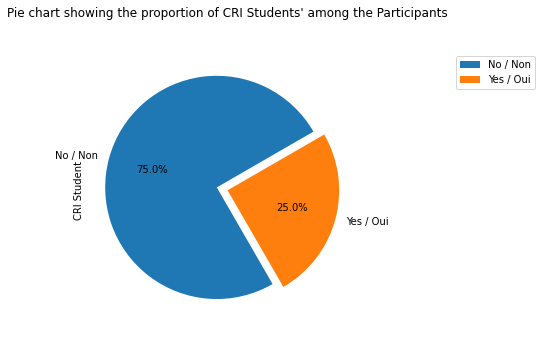

In [ ]:
#Cri Student
cri_list = final_df["Are you a CRI student? / Etes-vous étudiant au CRI ?"].to_list()
cri_dict = dict(Counter(cri_list))
cri_name = list(cri_dict.keys())
cri_numb = list(cri_dict.values())
explode4 = (0.1, 0)
data = {'CRI Student': cri_numb}
dfpie4 = pd.DataFrame(data,columns=['CRI Student'],index = cri_name)
dfpie4
dfpie4.plot.pie(y='CRI Student',figsize=(5, 90), explode=explode4, autopct='%1.1f%%', startangle=30)

plt.legend(['No / Non', 'Yes / Oui'], bbox_to_anchor=(1.3, 1.0), loc='upper left')
plt.title("Pie chart showing the proportion of CRI Students' among the Participants", y=1.1)
plt.show()

Most of the participants are CRI students which is also similar to last year results.

**Sleeping Quality vs Stress and Socialization**

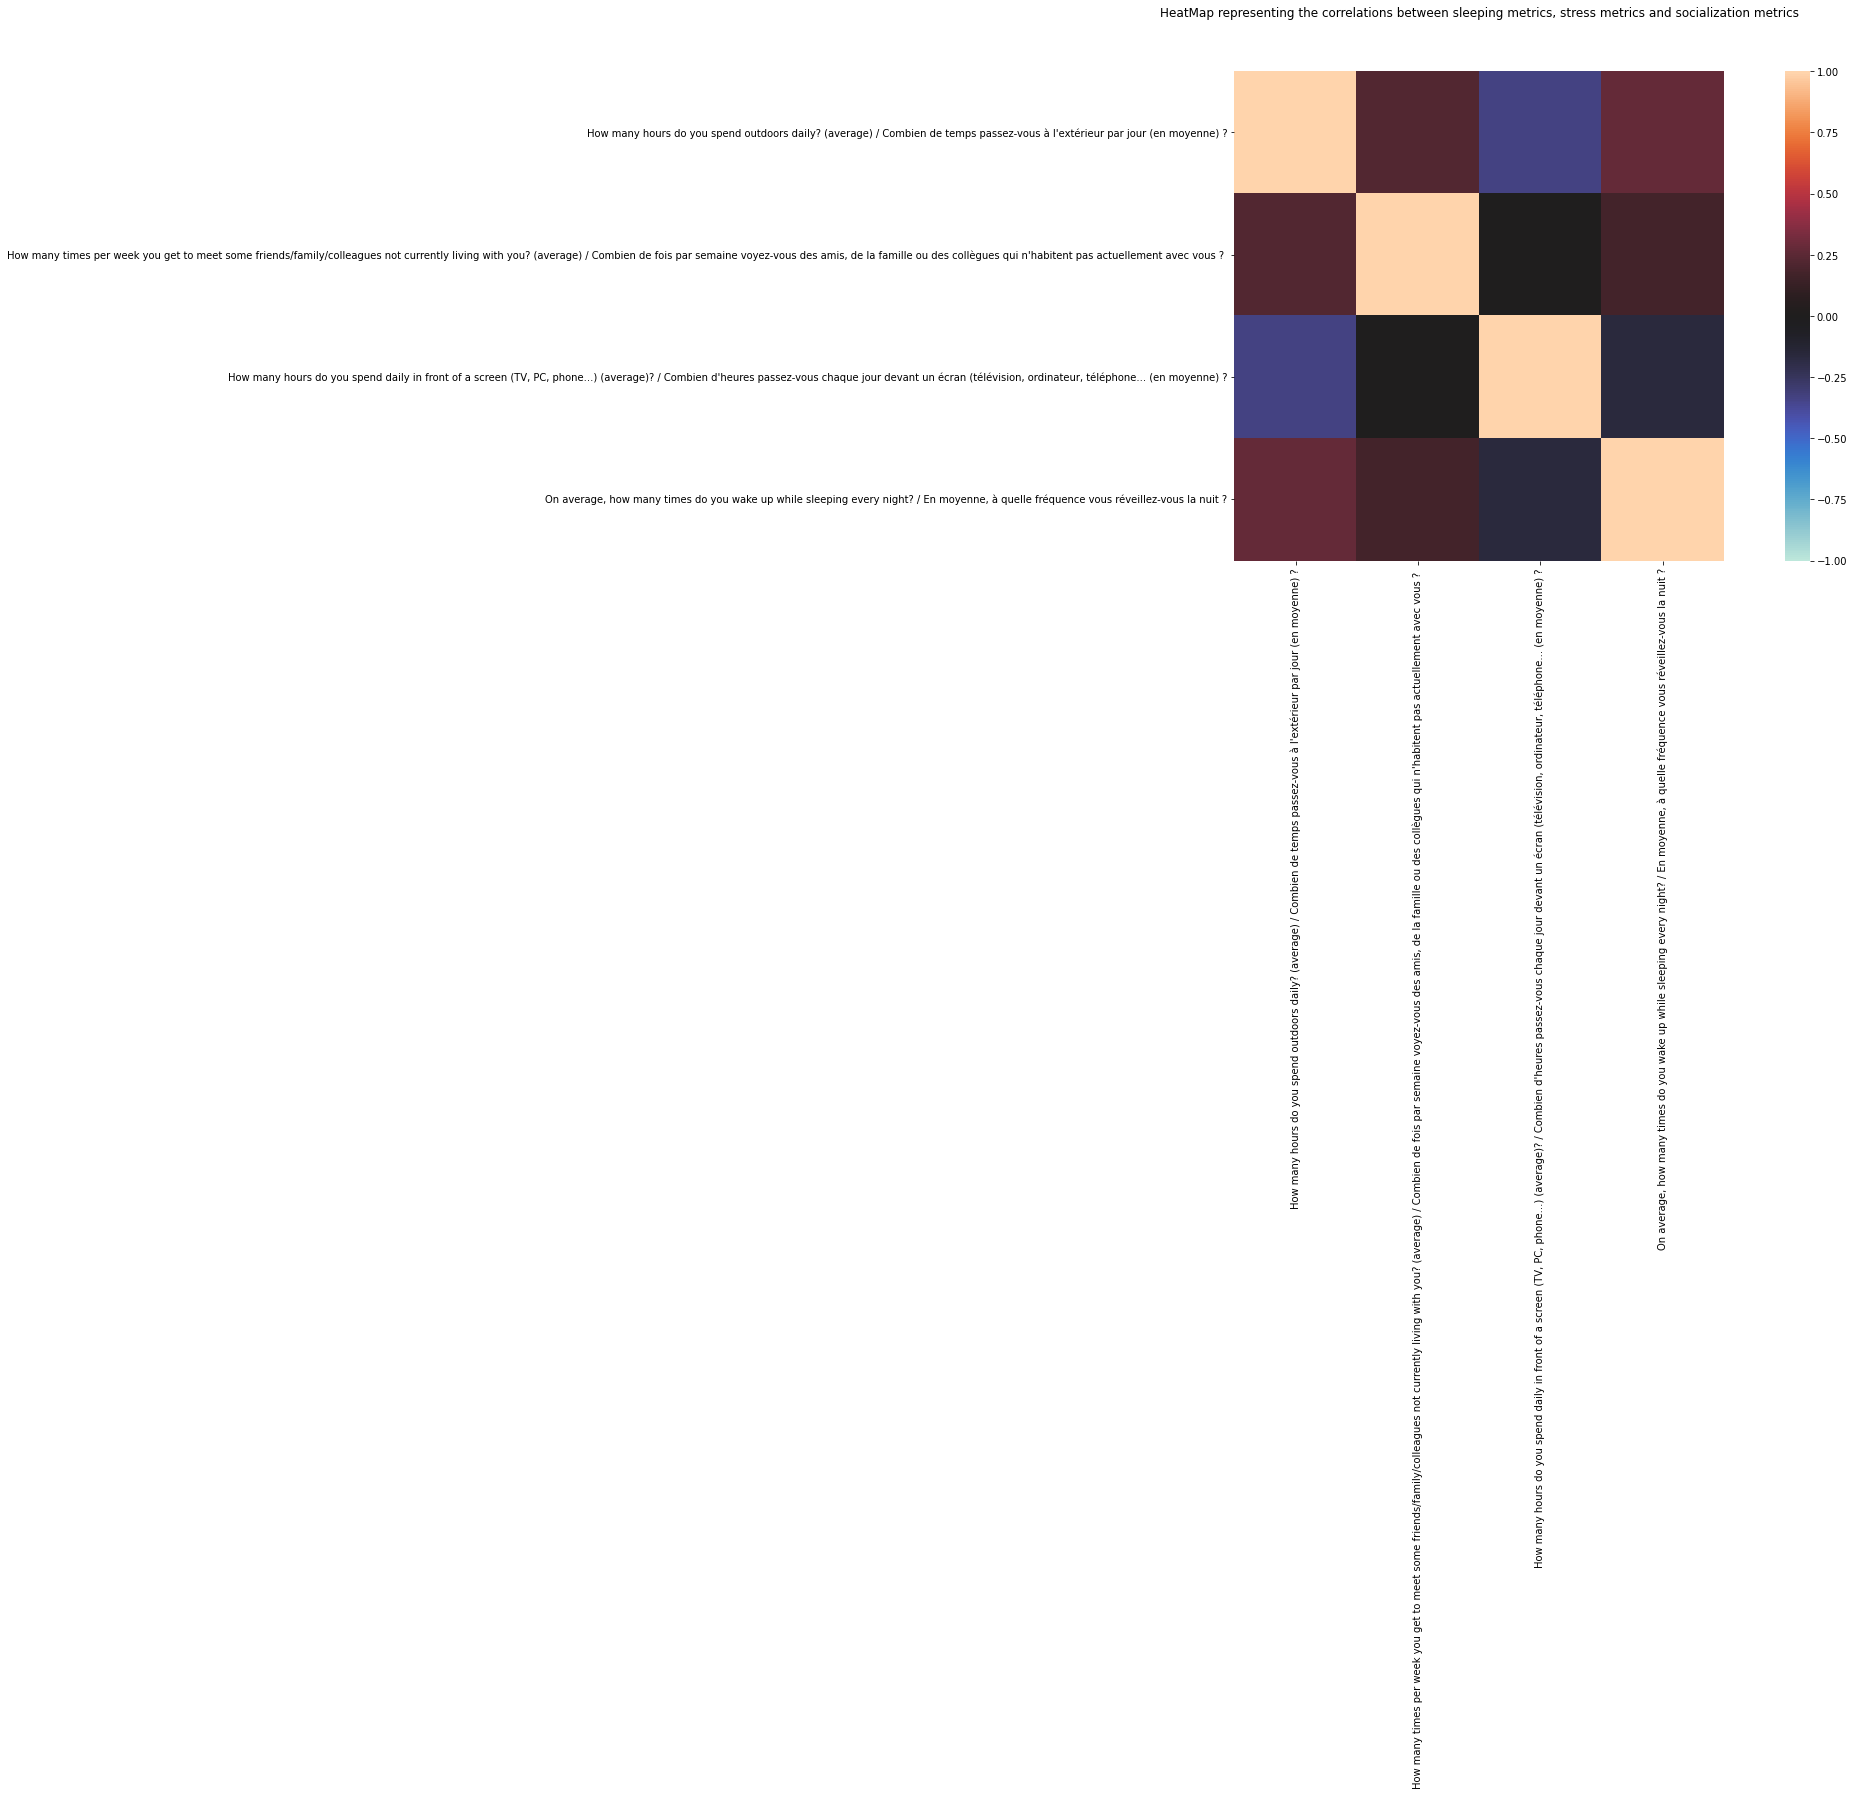

In [ ]:
df_corr = final_clean_df.corr()
df_corr
fig, ax = plt.subplots(figsize=(22, 9)) 
plt.title('HeatMap representing the correlations between sleeping metrics, stress metrics and socialization metrics', y=1.1)
sns.heatmap(df_corr, square=True, vmax=1, vmin=-1, center=0)

The sleeping quality metrics looks more correlated to socialization than last year (during the lockdown). Concerning stress, we need more data cleaning to analize the correlation with sleep quality

**More Vizualizations and explanations to come!!!**